# Ensemble Learning

## Imports

In [3]:
import pandas as pd
import os
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Datengrundlage

In [4]:
data = pd.read_csv(os.path.join('..', '..', '..', '..', 'data', 'mpg.csv'))
x_train, x_test, y_train, y_test = train_test_split(data.drop(["mpg"],axis=1),data["mpg"])
train = pd.concat([x_train,y_train],axis=1)
test = pd.concat([x_test,y_test],axis=1)

## Einfaches Modell

In [5]:
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

mse_tree = mean_squared_error(tree.predict(x_test),y_test)

## Leistungsfähigkeit visualisieren

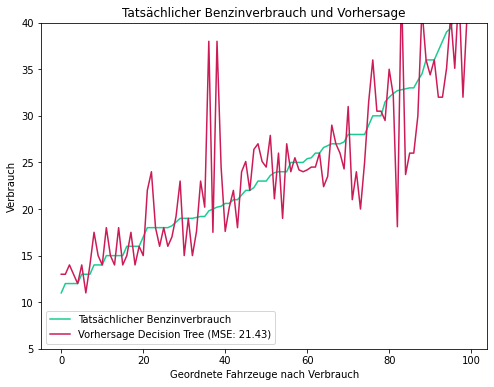

Decision Tree MSE: 21.43


In [6]:
plt.figure(figsize=(8,6))
plt.title("Tatsächlicher Benzinverbrauch und Vorhersage")
plt.plot(range(0,len(test)),test.sort_values("mpg")["mpg"],color="#1ACC94",label="Tatsächlicher Benzinverbrauch")
plt.plot(range(0,len(test)),tree.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="#CC1B58",label="Vorhersage Decision Tree (MSE: {:.2f})".format(mse_tree))
plt.xlabel("Geordnete Fahrzeuge nach Verbrauch")
plt.ylabel("Verbrauch")
plt.ylim([5,40])
plt.legend()
plt.show()
print("Decision Tree MSE: {:.2f}".format(mse_tree))

## Andere einfache Modelle

In [7]:
linreg = LinearRegression()
linreg.fit(x_train,y_train)

knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

mse_linreg = mean_squared_error(linreg.predict(x_test),y_test)
mse_knn = mean_squared_error(knn.predict(x_test),y_test)

## Leistungsfähigkeit visualisieren

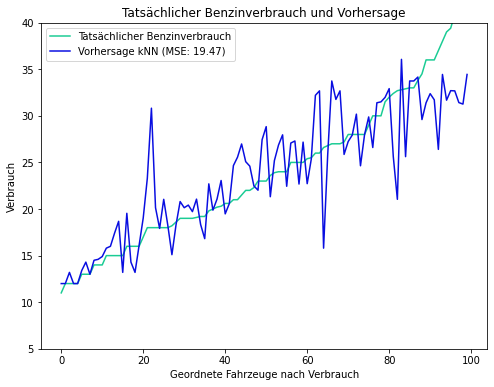

Decision Tree MSE: 21.43
Linear Regression MSE: 13.80
kNN MSE: 19.47


In [8]:
plt.figure(figsize=(8,6))
plt.title("Tatsächlicher Benzinverbrauch und Vorhersage")
plt.ylim([5,40])
plt.plot(range(0,len(test)),test.sort_values("mpg")["mpg"],color="#1ACC94",label="Tatsächlicher Benzinverbrauch")
#plt.plot(range(0,len(test)),tree.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="#CC1B58",label="Vorhersage Decision Tree (MSE: {:.2f})".format(mse_tree))
#plt.plot(range(0,len(test)),linreg.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="#7902E5",label="Vorhersage Linear Regression (MSE: {:.2f})".format(mse_linreg))
plt.plot(range(0,len(test)),knn.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="#090EE1",label="Vorhersage kNN (MSE: {:.2f})".format(mse_knn))
plt.xlabel("Geordnete Fahrzeuge nach Verbrauch")
plt.ylabel("Verbrauch")
plt.legend()
plt.show()
print("Decision Tree MSE: {:.2f}".format(mse_tree))
print("Linear Regression MSE: {:.2f}".format(mse_linreg))
print("kNN MSE: {:.2f}".format(mse_knn))

## Ensemble Learning

In [9]:
ensemble = VotingRegressor([("tree",DecisionTreeRegressor()),("linreg",LinearRegression()),("knn",KNeighborsRegressor())])
ensemble.fit(x_train,y_train)

mse_ensemble = mean_squared_error(ensemble.predict(x_test),y_test)

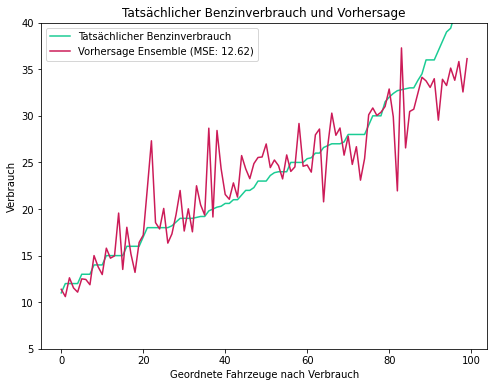

In [10]:
plt.figure(figsize=(8,6))
plt.ylim([5,40])
plt.title("Tatsächlicher Benzinverbrauch und Vorhersage")
plt.plot(range(0,len(test)),test.sort_values("mpg")["mpg"],color="#1ACC94",label="Tatsächlicher Benzinverbrauch")
plt.plot(range(0,len(test)),ensemble.predict(test.sort_values("mpg").drop(["mpg"],axis=1)),color="#CC1B58",label="Vorhersage Ensemble (MSE: {:.2f})".format(mse_ensemble))
plt.xlabel("Geordnete Fahrzeuge nach Verbrauch")
plt.ylabel("Verbrauch")
plt.legend()
plt.show()